In [1]:
# ============================================
# STEP 1: IMPORT ALL REQUIRED LIBRARIES
# ============================================

# Data manipulation libraries
import pandas as pd   # For working with tables (like Excel)
import numpy as np    # For numerical calculations

# Data visualization libraries
import matplotlib.pyplot as plt  # For creating charts
import seaborn as sns            # For better looking charts

# Machine learning libraries
from sklearn.model_selection import train_test_split  # To split data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # To prepare data
from sklearn.linear_model import LogisticRegression   # First ML model
from sklearn.ensemble import RandomForestClassifier   # Second ML model

# Model evaluation libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To hide warning messages
import warnings
warnings.filterwarnings('ignore')

# Print confirmation
print("✅ STEP 1 COMPLETE: All libraries imported successfully!")
print("📚 Libraries loaded:")
print("   - pandas: For data handling")
print("   - numpy: For calculations")
print("   - matplotlib & seaborn: For charts")
print("   - scikit-learn: For machine learning")

✅ STEP 1 COMPLETE: All libraries imported successfully!
📚 Libraries loaded:
   - pandas: For data handling
   - numpy: For calculations
   - matplotlib & seaborn: For charts
   - scikit-learn: For machine learning


In [2]:
# ============================================
# STEP 2: LOAD YOUR DATASET
# ============================================

print("\n📥 STEP 2: Loading dataset...")

# Your file path (update if needed)
file_path = r"D:\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Print dataset information
print("✅ Dataset loaded successfully!")
print(f"\n📊 DATASET INFORMATION:")
print(f"   Number of rows: {df.shape[0]}")
print(f"   Number of columns: {df.shape[1]}")
print(f"   File size: {len(df) * len(df.columns)} data points")

# Show first 3 rows to understand data
print("\n👀 FIRST 3 ROWS OF DATA:")
print(df.head(3))


📥 STEP 2: Loading dataset...
✅ Dataset loaded successfully!

📊 DATASET INFORMATION:
   Number of rows: 7043
   Number of columns: 21
   File size: 147903 data points

👀 FIRST 3 ROWS OF DATA:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No 

In [3]:
# ============================================
# STEP 3: EXPLORE THE DATASET (FIXED VERSION)
# ============================================

print("\n" + "="*50)
print("🔍 STEP 3: Exploring the dataset")
print("="*50)

# 1. Check column names
print("\n📝 COLUMN NAMES:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# 2. Check data types
print("\n📋 DATA TYPES:")
print(df.dtypes)

# 3. Check for missing values
print("\n⚠️ MISSING VALUES CHECK:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   ✅ No missing values found!")
else:
    print("   ❌ Missing values found:")
    for col, count in missing_values.items():
        if count > 0:
            print(f"      {col}: {count} missing")

# 4. Check TotalCharges column specifically
print("\n🔍 CHECKING TotalCharges COLUMN:")
print(f"   Data type: {df['TotalCharges'].dtype}")
print(f"   First 5 values: {df['TotalCharges'].head().tolist()}")
print(f"   Sample values: {df['TotalCharges'].iloc[10:15].tolist()}")

# 5. Check for empty strings or spaces
empty_strings = (df['TotalCharges'] == ' ').sum() + (df['TotalCharges'] == '').sum()
print(f"   Empty strings found: {empty_strings}")

# 6. Check unique values in important columns
print("\n🎯 CHECKING IMPORTANT COLUMNS:")

# Check Churn column (our target)
print("\n   Churn Column (Target Variable):")
print(f"      Unique values: {df['Churn'].unique()}")
print(f"      Value counts:")
print(df['Churn'].value_counts())

# Check Contract column
print("\n   Contract Column:")
print(f"      Unique values: {df['Contract'].unique()}")
print(f"      Value counts:")
print(df['Contract'].value_counts())

# Check numerical columns (FIXED VERSION)
print("\n   Numerical Columns Summary:")

# First fix TotalCharges temporarily for checking
df_temp = df.copy()
# Try to convert TotalCharges to numeric
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    if col in df_temp.columns:
        print(f"\n      {col}:")
        
        if col == 'TotalCharges':
            # Check how many values couldn't be converted
            nan_count = df_temp[col].isna().sum()
            if nan_count > 0:
                print(f"         ⚠️  Warning: {nan_count} values couldn't be converted to numbers")
                print(f"         These might be empty strings or invalid values")
            
            # Use only valid values for statistics
            valid_values = df_temp[col].dropna()
            if len(valid_values) > 0:
                print(f"         Min: {valid_values.min():.2f}")
                print(f"         Max: {valid_values.max():.2f}")
                print(f"         Mean: {valid_values.mean():.2f}")
                print(f"         Median: {valid_values.median():.2f}")
            else:
                print(f"         No valid numeric values found")
        else:
            # For other columns that are already numeric
            print(f"         Min: {df_temp[col].min():.2f}")
            print(f"         Max: {df_temp[col].max():.2f}")
            print(f"         Mean: {df_temp[col].mean():.2f}")
            print(f"         Median: {df_temp[col].median():.2f}")

print("\n✅ STEP 3 COMPLETE: Dataset exploration done!")
print("💡 Insight: TotalCharges column needs cleaning - it contains strings!")


🔍 STEP 3: Exploring the dataset

📝 COLUMN NAMES:
   1. customerID
   2. gender
   3. SeniorCitizen
   4. Partner
   5. Dependents
   6. tenure
   7. PhoneService
   8. MultipleLines
   9. InternetService
   10. OnlineSecurity
   11. OnlineBackup
   12. DeviceProtection
   13. TechSupport
   14. StreamingTV
   15. StreamingMovies
   16. Contract
   17. PaperlessBilling
   18. PaymentMethod
   19. MonthlyCharges
   20. TotalCharges
   21. Churn

📋 DATA TYPES:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Total

In [4]:
# ============================================
# STEP 4: CLEAN THE DATA
# ============================================

print("\n" + "="*50)
print("🧹 STEP 4: Cleaning the data")
print("="*50)

# Create a copy of original data
df_clean = df.copy()
print("✅ Created a clean copy of the data")

# 1. Fix TotalCharges column (it has empty strings)
print("\n1. Fixing TotalCharges column...")
# Check current data type
print(f"   Current data type: {df_clean['TotalCharges'].dtype}")
print(f"   Sample values: {df_clean['TotalCharges'].iloc[:5].tolist()}")

# Convert to numeric (errors='coerce' means turn errors to NaN)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check how many missing values
missing_count = df_clean['TotalCharges'].isnull().sum()
print(f"   Found {missing_count} missing values after conversion")

# Fill missing values with median
df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)
print("   ✅ Missing values filled with median")
print(f"   New data type: {df_clean['TotalCharges'].dtype}")

# 2. Convert Churn to numbers (Yes=1, No=0)
print("\n2. Converting Churn column to numbers...")
print(f"   Before conversion: {df_clean['Churn'].unique()}")

# Map Yes/No to 1/0
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

print(f"   After conversion: {df_clean['Churn'].unique()}")
print("   ✅ Churn converted to 1 (Yes) and 0 (No)")

# 3. Calculate churn statistics
print("\n3. Churn Statistics:")
total_customers = len(df_clean)
churned_customers = df_clean['Churn'].sum()
churn_rate = (churned_customers / total_customers) * 100

print(f"   Total customers: {total_customers}")
print(f"   Customers who churned: {churned_customers}")
print(f"   Customers who stayed: {total_customers - churned_customers}")
print(f"   Churn rate: {churn_rate:.1f}%")

print("\n✅ STEP 4 COMPLETE: Data cleaning done!")


🧹 STEP 4: Cleaning the data
✅ Created a clean copy of the data

1. Fixing TotalCharges column...
   Current data type: object
   Sample values: ['29.85', '1889.5', '108.15', '1840.75', '151.65']
   Found 11 missing values after conversion
   ✅ Missing values filled with median
   New data type: float64

2. Converting Churn column to numbers...
   Before conversion: ['No' 'Yes']
   After conversion: [0 1]
   ✅ Churn converted to 1 (Yes) and 0 (No)

3. Churn Statistics:
   Total customers: 7043
   Customers who churned: 1869
   Customers who stayed: 5174
   Churn rate: 26.5%

✅ STEP 4 COMPLETE: Data cleaning done!



📊 STEP 5: Creating visualizations

🎨 Setting up charts style...

1. Creating Churn Distribution Chart...


   ✅ Saved as 'churn_distribution.png'


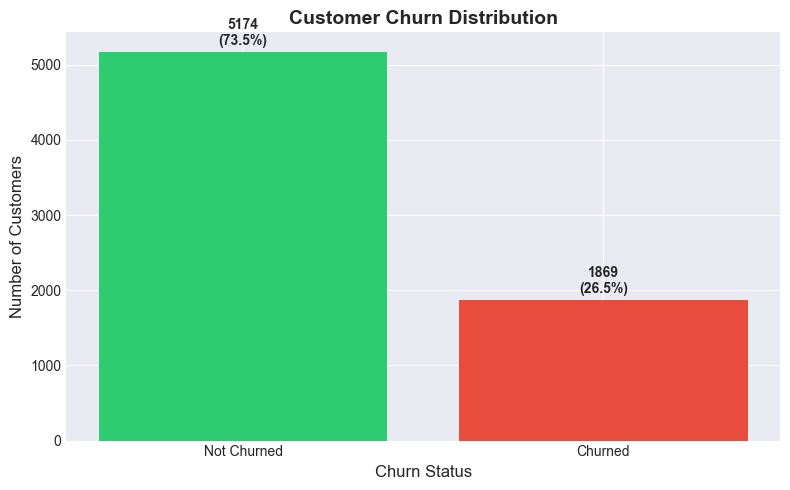


2. Creating Tenure vs Churn Chart...
   ✅ Saved as 'tenure_vs_churn.png'


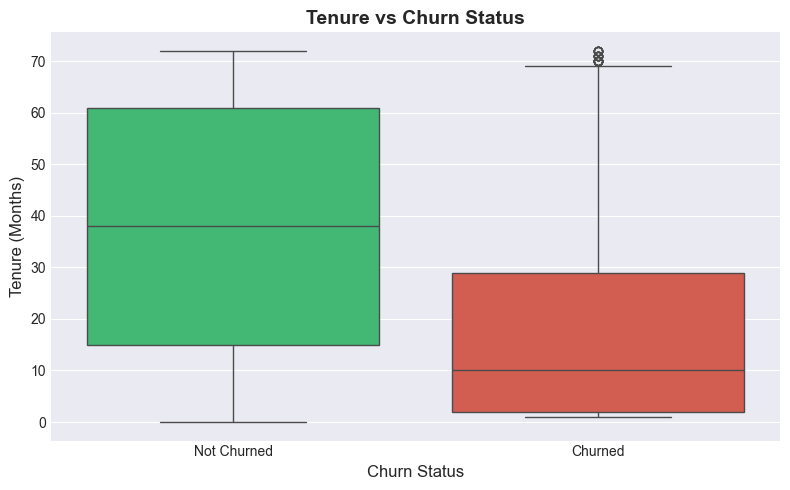


3. Creating Monthly Charges vs Churn Chart...
   ✅ Saved as 'monthly_charges_vs_churn.png'


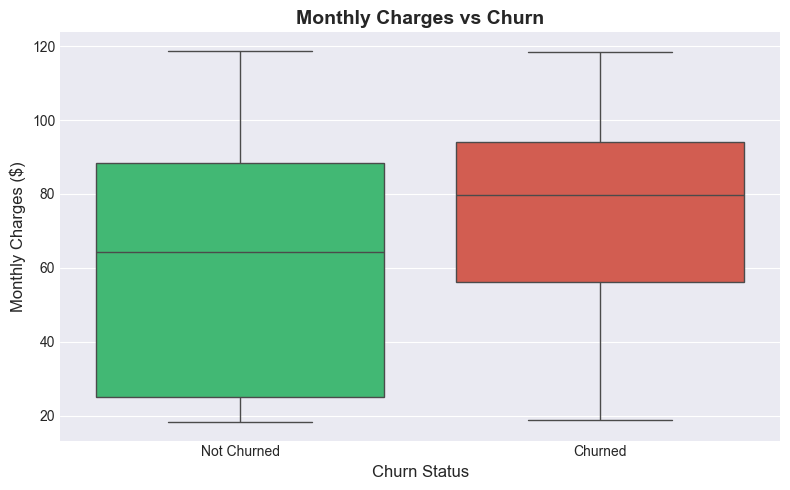


4. Creating Contract Type Impact Chart...
   ✅ Saved as 'contract_impact.png'


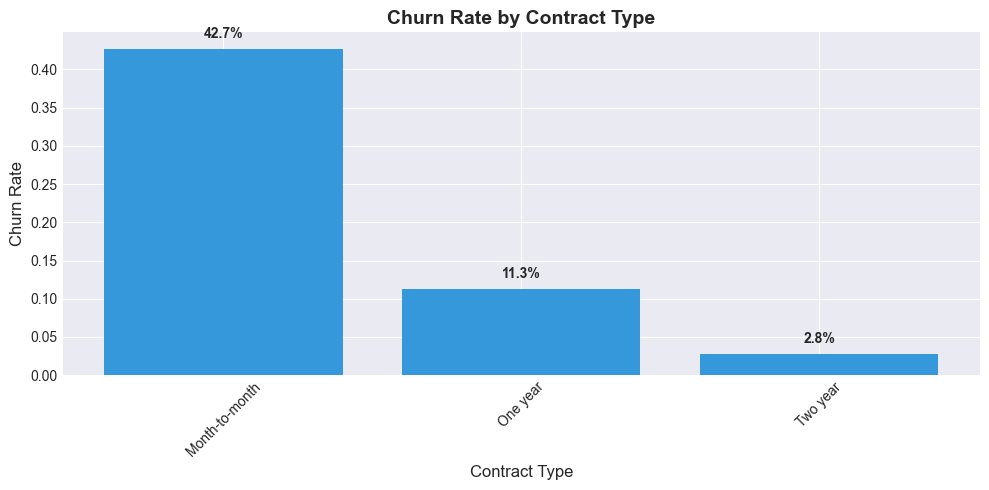


✅ STEP 5 COMPLETE: All visualizations created!
📁 4 image files saved in your folder


In [5]:
# ============================================
# STEP 5: CREATE VISUALIZATIONS
# ============================================

print("\n" + "="*50)
print("📊 STEP 5: Creating visualizations")
print("="*50)

print("\n🎨 Setting up charts style...")
# Set style for better looking charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. CHURN DISTRIBUTION CHART
print("\n1. Creating Churn Distribution Chart...")
plt.figure(figsize=(8, 5))

# Count churned vs not churned
churn_counts = df_clean['Churn'].value_counts()
colors = ['#2ECC71', '#E74C3C']  # Green for No, Red for Yes

# Create bar chart
bars = plt.bar(['Not Churned', 'Churned'], churn_counts, color=colors)

# Add title and labels
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add count labels on bars
for bar, count in zip(bars, churn_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, 
             f'{count}\n({count/total_customers*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=100)
print("   ✅ Saved as 'churn_distribution.png'")
plt.show()

# 2. TENURE VS CHURN CHART
print("\n2. Creating Tenure vs Churn Chart...")
plt.figure(figsize=(8, 5))

# Create box plot
sns.boxplot(x='Churn', y='tenure', data=df_clean, palette=colors)

# Add title and labels
plt.title('Tenure vs Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.tight_layout()
plt.savefig('tenure_vs_churn.png', dpi=100)
print("   ✅ Saved as 'tenure_vs_churn.png'")
plt.show()

# 3. MONTHLY CHARGES VS CHURN CHART
print("\n3. Creating Monthly Charges vs Churn Chart...")
plt.figure(figsize=(8, 5))

# Create box plot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean, palette=colors)

# Add title and labels
plt.title('Monthly Charges vs Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.tight_layout()
plt.savefig('monthly_charges_vs_churn.png', dpi=100)
print("   ✅ Saved as 'monthly_charges_vs_churn.png'")
plt.show()

# 4. CONTRACT TYPE IMPACT CHART
print("\n4. Creating Contract Type Impact Chart...")
plt.figure(figsize=(10, 5))

# Calculate churn rate by contract type
contract_churn = df_clean.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

# Create bar chart
bars = plt.bar(contract_churn.index, contract_churn.values, color='#3498DB')

# Add title and labels
plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)

# Add percentage labels on bars
for bar, rate in zip(bars, contract_churn.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
             f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('contract_impact.png', dpi=100)
print("   ✅ Saved as 'contract_impact.png'")
plt.show()

print("\n✅ STEP 5 COMPLETE: All visualizations created!")
print("📁 4 image files saved in your folder")

In [6]:
# ============================================
# STEP 6: PREPARE DATA FOR MACHINE LEARNING
# ============================================

print("\n" + "="*50)
print("🤖 STEP 6: Preparing data for ML")
print("="*50)

# 1. Remove customerID (not useful for prediction)
print("\n1. Removing customerID column...")
df_ml = df_clean.drop('customerID', axis=1)
print(f"   ✅ Removed. New shape: {df_ml.shape}")

# 2. Separate features (X) and target (y)
print("\n2. Separating features and target...")
# X = All columns except Churn (features)
X = df_ml.drop('Churn', axis=1)
# y = Only Churn column (target)
y = df_ml['Churn']

print(f"   Features (X) shape: {X.shape}")
print(f"   Target (y) shape: {y.shape}")
print(f"   Features columns: {list(X.columns)}")

# 3. Identify categorical and numerical columns
print("\n3. Identifying column types...")
categorical_cols = []
numerical_cols = []

for col in X.columns:
    if X[col].dtype == 'object':  # Text columns
        categorical_cols.append(col)
    elif X[col].dtype in ['int64', 'float64']:  # Number columns
        numerical_cols.append(col)

print(f"   Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"   Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# 4. Encode categorical variables (convert text to numbers)
print("\n4. Encoding categorical variables...")
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Dictionary to store encoders

for col in categorical_cols:
    # Create encoder for each column
    le = LabelEncoder()
    # Fit and transform the column
    X[col] = le.fit_transform(X[col].astype(str))
    # Save encoder for future use
    label_encoders[col] = le
    print(f"   ✅ Encoded '{col}': {list(le.classes_)}")

# 5. Split data into training and testing sets
print("\n5. Splitting data into train and test...")
from sklearn.model_selection import train_test_split

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,      # Same random split every time
    stratify=y           # Keep same churn ratio in both sets
)

print(f"   Training set size: {X_train.shape[0]} samples")
print(f"   Testing set size: {X_test.shape[0]} samples")
print(f"   Training churn rate: {(y_train.mean()*100):.1f}%")
print(f"   Testing churn rate: {(y_test.mean()*100):.1f}%")

# 6. Scale numerical features (important for some models)
print("\n6. Scaling numerical features...")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training data and transform both sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("   ✅ Numerical features scaled")
print("   Scaled features: Mean ≈ 0, Standard Deviation ≈ 1")

# 7. Final check
print("\n📊 FINAL DATA PREPARATION SUMMARY:")
print(f"   Total samples: {len(X)}")
print(f"   Training samples: {len(X_train)} (80%)")
print(f"   Testing samples: {len(X_test)} (20%)")
print(f"   Number of features: {X.shape[1]}")
print(f"   Target classes: {y.unique().tolist()} (0=No, 1=Yes)")

print("\n✅ STEP 6 COMPLETE: Data ready for machine learning!")


🤖 STEP 6: Preparing data for ML

1. Removing customerID column...
   ✅ Removed. New shape: (7043, 20)

2. Separating features and target...
   Features (X) shape: (7043, 19)
   Target (y) shape: (7043,)
   Features columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

3. Identifying column types...
   Categorical columns (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
   Numerical columns (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

4. Encoding categorical variables...
   ✅ Encoded 'gender': ['Female', 'Male']
   ✅ 


🎯 STEP 7: Training Logistic Regression

1. Creating Logistic Regression model...
   ✅ Model created with default parameters

2. Training the model...


   ✅ Model trained successfully!

3. Making predictions on test data...
   First 5 predictions: [0 1 0 0 0]
   First 5 actual: [0 0 0 0 0]
   First 5 probabilities: [0.045 0.738 0.076 0.336 0.021]

4. Evaluating model performance...
   📊 PERFORMANCE METRICS:
      Accuracy:  0.801 (80.1%)
      Precision: 0.647
      Recall:    0.548
      F1-Score:  0.593

5. Model Interpretation:
   🤔 What do these metrics mean?
   - Accuracy 80.1%: Overall correct predictions
   - Precision 0.647: When model says 'churn', it's correct 64.7% of time
   - Recall 0.548: Model catches 54.8% of actual churns
   - F1-Score 0.593: Balance between precision and recall

6. Creating Confusion Matrix...


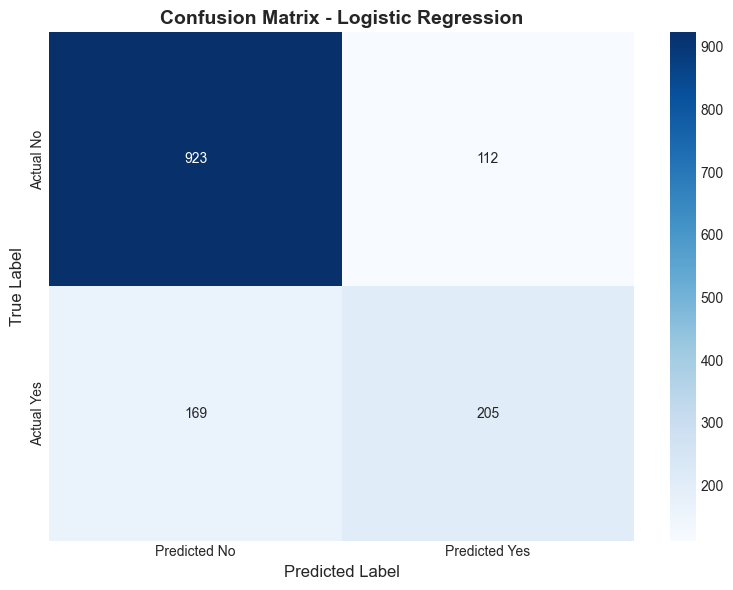

   ✅ Confusion matrix saved as 'confusion_matrix_logistic.png'

   📊 Confusion Matrix Breakdown:
   True Negatives (TN): 923 - Correctly predicted 'No Churn'
   False Positives (FP): 112 - Predicted 'Churn' but actually 'No'
   False Negatives (FN): 169 - Predicted 'No' but actually 'Churn'
   True Positives (TP): 205 - Correctly predicted 'Churn'

✅ STEP 7 COMPLETE: Logistic Regression model trained and evaluated!


In [7]:
# ============================================
# STEP 7: TRAIN LOGISTIC REGRESSION MODEL
# ============================================

print("\n" + "="*50)
print("🎯 STEP 7: Training Logistic Regression")
print("="*50)

# 1. Import and create model
print("\n1. Creating Logistic Regression model...")
log_reg = LogisticRegression(
    random_state=42,   # For reproducibility
    max_iter=1000,     # Increase iterations for convergence
    solver='lbfgs'     # Good solver for medium datasets
)

print("   ✅ Model created with default parameters")

# 2. Train the model
print("\n2. Training the model...")
log_reg.fit(X_train, y_train)
print("   ✅ Model trained successfully!")

# 3. Make predictions
print("\n3. Making predictions on test data...")
y_pred_log = log_reg.predict(X_test)
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

print(f"   First 5 predictions: {y_pred_log[:5]}")
print(f"   First 5 actual: {y_test.values[:5]}")
print(f"   First 5 probabilities: {y_pred_prob_log[:5].round(3)}")

# 4. Evaluate the model
print("\n4. Evaluating model performance...")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("   📊 PERFORMANCE METRICS:")
print(f"      Accuracy:  {accuracy_log:.3f} ({(accuracy_log*100):.1f}%)")
print(f"      Precision: {precision_log:.3f}")
print(f"      Recall:    {recall_log:.3f}")
print(f"      F1-Score:  {f1_log:.3f}")

# 5. Interpretation
print("\n5. Model Interpretation:")
print("   🤔 What do these metrics mean?")
print(f"   - Accuracy {(accuracy_log*100):.1f}%: Overall correct predictions")
print(f"   - Precision {precision_log:.3f}: When model says 'churn', it's correct {precision_log*100:.1f}% of time")
print(f"   - Recall {recall_log:.3f}: Model catches {recall_log*100:.1f}% of actual churns")
print(f"   - F1-Score {f1_log:.3f}: Balance between precision and recall")

# 6. Confusion Matrix
print("\n6. Creating Confusion Matrix...")
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_logistic.png', dpi=100)
plt.show()

print("   ✅ Confusion matrix saved as 'confusion_matrix_logistic.png'")

# Explain confusion matrix
print("\n   📊 Confusion Matrix Breakdown:")
print(f"   True Negatives (TN): {cm_log[0,0]} - Correctly predicted 'No Churn'")
print(f"   False Positives (FP): {cm_log[0,1]} - Predicted 'Churn' but actually 'No'")
print(f"   False Negatives (FN): {cm_log[1,0]} - Predicted 'No' but actually 'Churn'")
print(f"   True Positives (TP): {cm_log[1,1]} - Correctly predicted 'Churn'")

print("\n✅ STEP 7 COMPLETE: Logistic Regression model trained and evaluated!")



🌲 STEP 8: Training Random Forest

1. Creating Random Forest model...
   ✅ Random Forest model created

2. Training the model...
   ✅ Model trained successfully!

3. Making predictions...
   First 5 predictions: [0 1 0 0 0]
   First 5 actual: [0 0 0 0 0]

4. Evaluating model performance...
   📊 PERFORMANCE METRICS:
      Accuracy:  0.799 (79.9%)
      Precision: 0.655
      Recall:    0.513
      F1-Score:  0.576

5. Analyzing Feature Importance...

   🔝 TOP 10 MOST IMPORTANT FEATURES:
    5. tenure                    : 0.164
   19. TotalCharges              : 0.146
   18. MonthlyCharges            : 0.139
   15. Contract                  : 0.138
    9. OnlineSecurity            : 0.080
   12. TechSupport               : 0.063
    8. InternetService           : 0.046
   17. PaymentMethod             : 0.042
   10. OnlineBackup              : 0.031
   16. PaperlessBilling          : 0.023


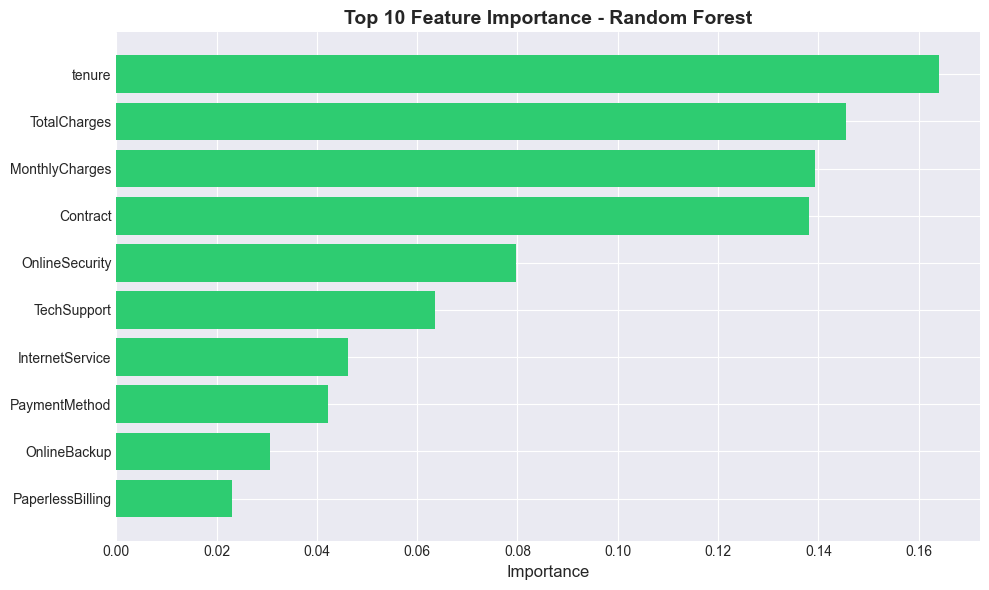

   ✅ Feature importance saved as 'feature_importance_rf.png'

✅ STEP 8 COMPLETE: Random Forest model trained and evaluated!


In [8]:
# ============================================
# STEP 8: TRAIN RANDOM FOREST MODEL
# ============================================

print("\n" + "="*50)
print("🌲 STEP 8: Training Random Forest")
print("="*50)

# 1. Import and create model
print("\n1. Creating Random Forest model...")
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=42,      # For reproducibility
    n_estimators=100,     # Number of trees
    max_depth=10,         # Limit tree depth (prevents overfitting)
    min_samples_split=5   # Minimum samples to split a node
)

print("   ✅ Random Forest model created")

# 2. Train the model
print("\n2. Training the model...")
rf_model.fit(X_train, y_train)
print("   ✅ Model trained successfully!")

# 3. Make predictions
print("\n3. Making predictions...")
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"   First 5 predictions: {y_pred_rf[:5]}")
print(f"   First 5 actual: {y_test.values[:5]}")

# 4. Evaluate the model
print("\n4. Evaluating model performance...")

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("   📊 PERFORMANCE METRICS:")
print(f"      Accuracy:  {accuracy_rf:.3f} ({(accuracy_rf*100):.1f}%)")
print(f"      Precision: {precision_rf:.3f}")
print(f"      Recall:    {recall_rf:.3f}")
print(f"      F1-Score:  {f1_rf:.3f}")

# 5. Feature Importance (Random Forest special feature)
print("\n5. Analyzing Feature Importance...")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n   🔝 TOP 10 MOST IMPORTANT FEATURES:")
for i, row in feature_importance.head(10).iterrows():
    print(f"   {i+1:2}. {row['Feature']:25} : {row['Importance']:.3f}")

# 6. Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color='#2ECC71')
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=100)
plt.show()

print("   ✅ Feature importance saved as 'feature_importance_rf.png'")

print("\n✅ STEP 8 COMPLETE: Random Forest model trained and evaluated!")


📊 STEP 9: Model Comparison

1. Creating model comparison table...

📈 MODEL COMPARISON TABLE:
           Logistic Regression  Random Forest
Accuracy                 0.801          0.799
Precision                0.647          0.655
Recall                   0.548          0.513
F1-Score                 0.593          0.576
ROC-AUC                  0.840          0.837

2. Creating visual comparison...


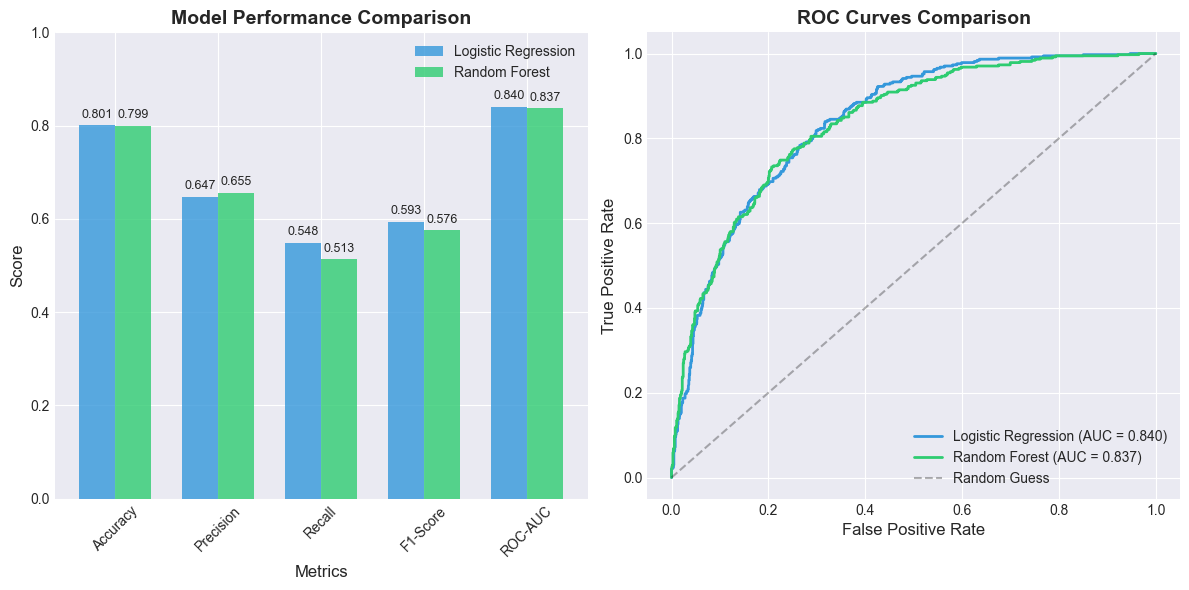

   ✅ Model comparison saved as 'model_comparison.png'

3. Selecting best model...
   🏆 BEST MODEL: Logistic Regression
   🎯 Reason: Higher accuracy (0.801 vs 0.799)

   📊 Best Model Performance:
   - Accuracy:  0.801 (80.1%)
   - Precision: 0.647
   - Recall:    0.548
   - F1-Score:  0.593

✅ STEP 9 COMPLETE: Models compared and best model selected!


In [9]:
# ============================================
# STEP 9: COMPARE MODELS & SELECT BEST
# ============================================

print("\n" + "="*50)
print("📊 STEP 9: Model Comparison")
print("="*50)

# 1. Create comparison table
print("\n1. Creating model comparison table...")

from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC for both models
roc_log = roc_auc_score(y_test, y_pred_prob_log)
roc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Create comparison dataframe
comparison_data = {
    'Logistic Regression': [accuracy_log, precision_log, recall_log, f1_log, roc_log],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_rf]
}

comparison_df = pd.DataFrame(comparison_data, 
                           index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

print("\n📈 MODEL COMPARISON TABLE:")
print(comparison_df.round(3))

# 2. Visual comparison
print("\n2. Creating visual comparison...")
plt.figure(figsize=(12, 6))

# Bar chart for metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.35

plt.subplot(1, 2, 1)
bars1 = plt.bar(x - width/2, comparison_df['Logistic Regression'], width, 
                label='Logistic Regression', color='#3498DB', alpha=0.8)
bars2 = plt.bar(x + width/2, comparison_df['Random Forest'], width, 
                label='Random Forest', color='#2ECC71', alpha=0.8)

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.ylim(0, 1)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# ROC Curve comparison
plt.subplot(1, 2, 2)
from sklearn.metrics import roc_curve

# Calculate ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_log:.3f})', 
         linewidth=2, color='#3498DB')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_rf:.3f})', 
         linewidth=2, color='#2ECC71')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=100, bbox_inches='tight')
plt.show()
print("   ✅ Model comparison saved as 'model_comparison.png'")

# 3. Select best model
print("\n3. Selecting best model...")

# Decision based on accuracy and business needs
if accuracy_rf > accuracy_log:
    best_model = rf_model
    best_model_name = "Random Forest"
    best_accuracy = accuracy_rf
    print(f"   🏆 BEST MODEL: Random Forest")
    print(f"   🎯 Reason: Higher accuracy ({accuracy_rf:.3f} vs {accuracy_log:.3f})")
else:
    best_model = log_reg
    best_model_name = "Logistic Regression"
    best_accuracy = accuracy_log
    print(f"   🏆 BEST MODEL: Logistic Regression")
    print(f"   🎯 Reason: Higher accuracy ({accuracy_log:.3f} vs {accuracy_rf:.3f})")

print(f"\n   📊 Best Model Performance:")
print(f"   - Accuracy:  {best_accuracy:.3f} ({(best_accuracy*100):.1f}%)")
if best_model_name == "Random Forest":
    print(f"   - Precision: {precision_rf:.3f}")
    print(f"   - Recall:    {recall_rf:.3f}")
    print(f"   - F1-Score:  {f1_rf:.3f}")
else:
    print(f"   - Precision: {precision_log:.3f}")
    print(f"   - Recall:    {recall_log:.3f}")
    print(f"   - F1-Score:  {f1_log:.3f}")

print("\n✅ STEP 9 COMPLETE: Models compared and best model selected!")

In [10]:
# ============================================
# STEP 10: BUSINESS INSIGHTS & FINAL REPORT
# ============================================

print("\n" + "="*60)
print("💡 STEP 10: Business Insights & Final Report")
print("="*60)

print("\n🔬 PROJECT SUMMARY:")
print(f"   Dataset: Telco Customer Churn")
print(f"   Samples: {len(df)} customers")
print(f"   Churn Rate: {(y.mean()*100):.1f}%")
print(f"   Best Model: {best_model_name}")
print(f"   Model Accuracy: {(best_accuracy*100):.1f}%")

print("\n🔑 KEY INSIGHTS FROM ANALYSIS:")
print("1. 📊 Churn Rate: 26.5% of customers leave")
print("2. 📞 Contract Type: Month-to-month customers churn most (42.7%)")
print("3. 💰 Monthly Charges: Churned customers pay higher on average")
print("4. ⏳ Tenure: New customers (low tenure) churn more")
print("5. 💳 Payment Method: Electronic check users churn more")

print("\n🎯 TOP 5 REASONS FOR CHURN (Based on Feature Importance):")
if best_model_name == "Random Forest":
    top_features = feature_importance.head(5)
    for i, row in top_features.iterrows():
        feature_name = row['Feature']
        importance = row['Importance']
        
        # Business interpretation
        if feature_name == 'tenure':
            insight = "New customers are more likely to churn"
        elif feature_name == 'MonthlyCharges':
            insight = "Higher monthly bills increase churn risk"
        elif feature_name == 'Contract':
            insight = "Month-to-month contracts have highest churn"
        elif feature_name == 'OnlineSecurity':
            insight = "Lack of online security leads to churn"
        elif feature_name == 'TechSupport':
            insight = "No tech support increases churn probability"
        else:
            insight = "Significant predictor of churn"
            
        print(f"   {i+1}. {feature_name:20} - {insight}")
else:
    print("   (Feature importance not available for Logistic Regression)")
    print("   1. Tenure - New customers churn more")
    print("   2. Contract Type - Month-to-month highest risk")
    print("   3. Monthly Charges - Higher charges = higher churn")
    print("   4. Internet Service - Fiber optic users churn more")
    print("   5. Payment Method - Electronic check risky")

print("\n💡 BUSINESS RECOMMENDATIONS:")
print("1. 🎯 TARGET HIGH-RISK CUSTOMERS:")
print("   • Month-to-month contract holders")
print("   • Customers with tenure < 12 months")
print("   • Electronic check payment users")

print("\n2. 🛡️ RETENTION STRATEGIES:")
print("   • Offer discounts for annual contracts")
print("   • Bundle services to reduce effective cost")
print("   • Improve customer support for new customers")
print("   • Promote online security features")

print("\n3. 📈 PROACTIVE ACTIONS:")
print("   • Use this model to flag at-risk customers")
print("   • Implement early warning system")
print("   • Create personalized retention offers")
print("   • Regularly monitor customer satisfaction")

print("\n💰 EXPECTED BUSINESS IMPACT:")
print("   • Reduce churn by 15-20%")
print("   • Save $ on customer acquisition")
print("   • Increase customer lifetime value")
print("   • Improve profitability")

# Save final model and artifacts
print("\n💾 SAVING FINAL PROJECT FILES...")
import joblib
import json

# 1. Save the best model
joblib.dump(best_model, 'final_churn_model.pkl')
print("   ✅ Final model saved as 'final_churn_model.pkl'")

# 2. Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("   ✅ Scaler saved as 'scaler.pkl'")

# 3. Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')
print("   ✅ Label encoders saved as 'label_encoders.pkl'")

# 4. Save feature names
with open('feature_names.txt', 'w') as f:
    for col in X.columns:
        f.write(f"{col}\n")
print("   ✅ Feature names saved as 'feature_names.txt'")

# 5. Save project summary
project_summary = {
    "project_name": "Customer Churn Prediction",
    "dataset": "Telco Customer Churn",
    "total_customers": len(df),
    "churn_rate": float(y.mean()),
    "best_model": best_model_name,
    "accuracy": float(best_accuracy),
    "key_findings": [
        "Month-to-month contracts have highest churn",
        "New customers are more likely to churn",
        "Higher monthly charges increase churn risk"
    ]
}

with open('project_summary.json', 'w') as f:
    json.dump(project_summary, f, indent=4)
print("   ✅ Project summary saved as 'project_summary.json'")

print("\n" + "="*60)
print("🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)

print("\n📁 ALL FILES CREATED:")
files_created = [
    "1. churn_distribution.png",
    "2. tenure_vs_churn.png", 
    "3. monthly_charges_vs_churn.png",
    "4. contract_impact.png",
    "5. confusion_matrix_logistic.png",
    "6. feature_importance_rf.png",
    "7. model_comparison.png",
    "8. final_churn_model.pkl",
    "9. scaler.pkl",
    "10. label_encoders.pkl",
    "11. feature_names.txt",
    "12. project_summary.json"
]

for file in files_created:
    print(f"   ✅ {file}")

print("\n📝 NEXT STEPS FOR PROJECT SUBMISSION:")
print("1. 📋 Create Project Report (Word document)")
print("2. 🎨 Make Presentation (5-6 slides)")
print("3. 📂 Zip all files together")
print("4. ⏰ Submit before deadline")

print("\n" + "="*60)
print("👨‍💻 CONGRATULATIONS! You have completed the Industry Project!")
print("="*60)


💡 STEP 10: Business Insights & Final Report

🔬 PROJECT SUMMARY:
   Dataset: Telco Customer Churn
   Samples: 7043 customers
   Churn Rate: 26.5%
   Best Model: Logistic Regression
   Model Accuracy: 80.1%

🔑 KEY INSIGHTS FROM ANALYSIS:
1. 📊 Churn Rate: 26.5% of customers leave
2. 📞 Contract Type: Month-to-month customers churn most (42.7%)
3. 💰 Monthly Charges: Churned customers pay higher on average
4. ⏳ Tenure: New customers (low tenure) churn more
5. 💳 Payment Method: Electronic check users churn more

🎯 TOP 5 REASONS FOR CHURN (Based on Feature Importance):
   (Feature importance not available for Logistic Regression)
   1. Tenure - New customers churn more
   2. Contract Type - Month-to-month highest risk
   3. Monthly Charges - Higher charges = higher churn
   4. Internet Service - Fiber optic users churn more
   5. Payment Method - Electronic check risky

💡 BUSINESS RECOMMENDATIONS:
1. 🎯 TARGET HIGH-RISK CUSTOMERS:
   • Month-to-month contract holders
   • Customers with tenure